# **Introduction to Financial Python**

## Variables aleatorias y distribuciones

### **Introducción**

En el último capitulo aprendimos la definición de media y varianza, que son un tipo de **estimación puntual**. Estimación puntual significa usar unos datos de muestra para calcular un solo valor que sirve como la 'mejor estimación' de una población desconocida. Sin embargo, esto no es suficiente porque las estimaciones puntuales pueden ser engañosas. Necesitamos usar métodos más rigurosos para testear nuestras ideas. Es por eso que consideramos la distribución y la prueba de hipotesis. La distribución de variable aleatoria es la base de la mayoria de todos los temas financieros cuantitativos: regresión lineal, CAPM, Black-Scholes, precios de arboles binomiales.

## **Variables aleatorias**

Primer comenzaremos con el concepto de **variable aleatoria**. Una variable aleatoria puede ser pensada como un dibujo de una distribución cuyo resultado antes del sorteo es incierto. Imagina tirar un dado, sabes que la posibilidad de obtener cada uno es 1/6, pero no sabes cual es el siguiente número que va a caer. Si tiramos los dados N veces y grabamos el número de cada roll, una colección de esos números es llamada **variable aleatoria discreta**. Una variable puede tomar un número finito de valores. Para nuestro ejemplo, solo podemos tomar números de {1,2,3,4,5,6}. El otro tipo de variable es la **variable aleatoria continua**. Una variable continua puede tomar cualquier valor de un rango dado. Puedes pensar en la tasa de rendimiento como una variable continua, esta teoricamente puede ser tomar cualquier valor desde $(-\infty, +\infty)$.

## **Distribuciones**

Cada variable aleatoria sigue una **distribución de probabilidad**, que es una función que se puede pensar que proporciona probabilidades de ocurrencia de diferentes resultados posibles en un experimento. En nuestro ejemplo, la distribución de probabilidad de cada número es 1/6. Usualmente usamos $P(X)$ para representar una función de distribución de probabilidad, donde $X$ es el valor de resultado. En nuestro ejemplo, $P(1)=P(2)=p(3)=1/6$. Sin embargo, no podemos usar esto como una distribución continua, porque la probabilidad de dibujar un número especifico de una variable continua es 0, debido a los infinitos posibles resultados que tenemos. En lugar de usar **la función de densidad de probabilidad (PDF)** describe la probabilidad que un valor está en un rango especifico. Cubriremos despues. Para cada función de distribución de probabilidad, tenemos una **función de distribución acumulada (CDF)**. Está definido como $P(X \leq x)$, que modelan la probabilidad que la variable aleatoria $X$ tome un valor menos o igual a $x$. Para variables discretas aleatorias, solo resumimos los valores menores o iguales a $x$ y luego lo dividimos con el número de observaciones.

**Distribuciones uniformes**

Las distribuciones uniformes son el tipo más simple de distribución de probabilidad. Una distribución discreta uniforme tiene igual peso asignado a todos los resultados. Tanto tirar un dado como lanzar una moneda son distribuciones clásicas uniformes. Usaremos Python para simular un dado 10000 veces.

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#define a function to simulate rolling a dice

def dice():
  number= [1,2,3,4,5,6]
  return random.choice(number)


series= np.array([dice() for x in range(10000)])

print(series)

[4 6 4 ... 3 4 2]


Creamos una serie de valores aleatorios aqui. Podemos dibujar los valores en el eje x y ponemos el número de ocurrencias en el eje y para tener una vista directa de la distribución.

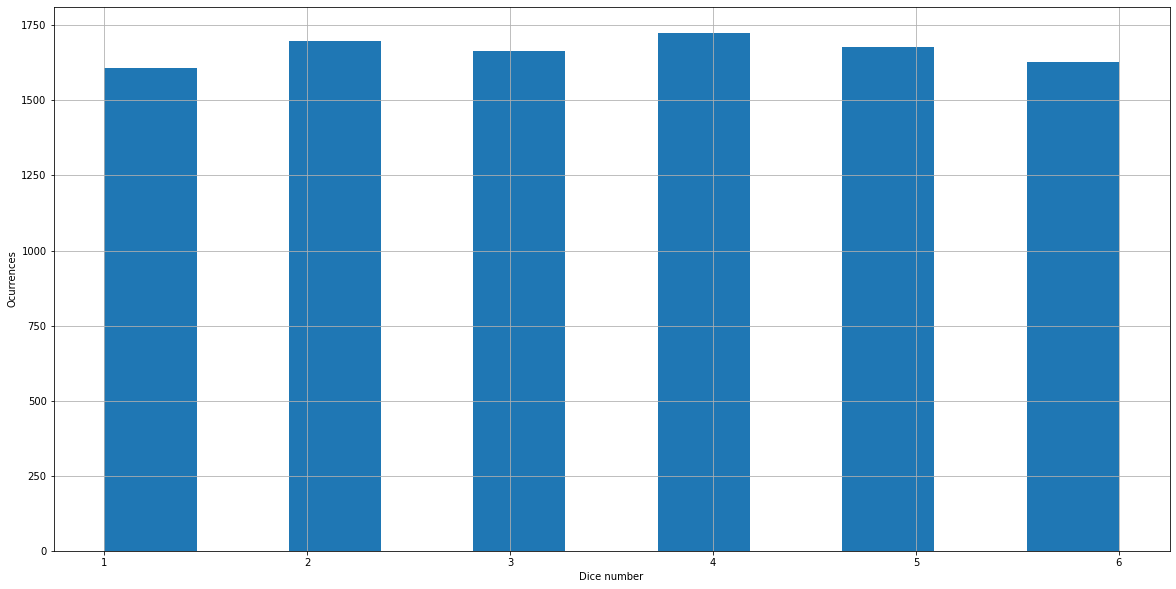

In [8]:
plt.figure(figsize = (20,10))
plt.hist(series,bins = 11, align= 'mid');
plt.xlabel('Dice number')
plt.ylabel('Ocurrences')
plt.grid()
plt.show()

Diremos que queremos conocer la frecuencia de las observaciones son menores o iguales a 3. En otras palabras queremos buscar los valores de $P(X \leq 3)$.

In [18]:
print(len([x for x in series if x <= 3])/float(len(series)))
print(np.mean(series))

0.4971
3.5047


$P(X \leq 3)$ está muy cerca a 0.5. Esto no es sorprendente porque nosotros tiramos un dado 1000 veces, y la frecuencia de las observaciónes son menores o iguales a 3 podrian ser cercanas a la probabilidad real, que es 0.5. Para una distribución uniforme dada, es sencillo calcular la media, este es el centro de distribución porque cada resultado es de igual peso. Para nuestro ejemplo de dados, podemos pensar de esto como:

\\

$$\mu =(1+2+3+4+5+6)/6=3.5$$

\\

$$E(x)=1*\frac{1}{6}+2*\frac{1}{6}+...+6*\frac{1}{6}=3.5$$

\\

Más generalmente, si asumimos que el valor mínimo de una distribución uniforme es $a$ y el máximo valor es $b$, la media es dada por:

\\

$$\bar{u}=\frac{a+b}{2}$$

\\

Usualmente usamos $\bar{u}$ para representar la **media poblacional**, o la 'media real'. Podemos crear un ejemplo con 1000 observaciones, la media que calculamos anteriormente es la **media muestral**. La media muestral usualmente no es igual a la población teorica a menos que el número de observaciones tienda a infinito. La varianza es dada por:

$$\sigma^2=\frac{(b-a)^2}{12}$$

Deducir la formula está fuera del alcance de nuestra conferencia. Es util realizar una distribución estandar dada, podemos formalizar su media y varianza.

**Distribución Binomial**

Una distribución binomial es una distribución de probabilidad discreta de los numeros de exitos de una secuencia de $n$ experimentos independientes. Asumamos que el mercado tiene $\% 50$ de probabilidades de subir y $\% 50$ de probabilidades de bajar, Si lo observamos en los siguientes 10 dias ¿Cual es la distribución del número de días en que sube? Esta es un ejemplo de una distribución binomial. En general, si realizamos el experimento $n$ veces, y cada resultado es independiente, con la misma probabilidad de éxito $p$, la probabilidad de obtener exactamente $k$ éxitos es dada por la función:

\\

$$P(X=K)=C_n^kp^k(1-p)^{n-k}$$

\\

Donde:

\\

$$C_n^k=\frac{n!}{(n-k)!k!}$$

\\

Bajo tal circustancia decimos que $X$ sigue la distribución binomial $X \thicksim B(n,p)$. Simularemos un experimento binomial con tasa de éxito $p=0.7$ y tiempos de experimento $n=10$.


In [19]:
def trial():
  number= [1,2,3,4,5,6,7,8,9,10]
  a = random.choice(number)
  if a<= 7:
    return 1
  else:
    return 0

Cada vez que ejecutamos `trial()`, hacemos un experimento. Si se tiene éxito, regresará 1, de otra forma regresará 0. Ahora vamos a hacer el experimento 10 veces.



In [20]:
res = [trial() for x in range(10)]
print(sum(res))

3


Hicimos el experimento 10 veces, y el número de éxitos es `sum(res)`. Sin embargo, esto significa que durante esos 10 experimentos tendremos éxito `sum(res)` veces. Si queremos ver la distribución binomial, necesitamos experimentar N veces. Cuando $n$ es lo suficientemente largo, nuestra frecuencia se acercará a la probabilidad teórica. Aqui simularemos cada resultado 10000 veces.

In [22]:
def binomial(number):
  l = []
  for i in range(10000):
    res = [trial() for x in range(10)]
    l.append(sum(res))
  return len([x for x in l if x == number])/float(len(l))

print(binomial(8))



0.2311


El número anteriormente impreso es la probabilidad simulada que tengamos éxito 8 veces si experimentamos 10 veces. Por cada posible resultado, simularemos la probabilidad.

In [23]:
prob = []

for i in range(1,11):
  prob.append(binomial(i))
prob_s = pd.Series(prob, index = range(1,11))

print(prob_s)

1     0.0001
2     0.0013
3     0.0092
4     0.0370
5     0.1055
6     0.1969
7     0.2684
8     0.2322
9     0.1185
10    0.0327
dtype: float64


Aquí obtenemos un resultado simulado de una distribución binomial. Ahora vamos a revisar si la frecuencia simulada está lo suficientemente cerca a las probabilidades teóricas. Tomemos $X=7$ y $X=8$ como ejemplo:

In [28]:
import math

print((float(math.factorial(10))/(math.factorial(7)*math.factorial(10-7)))*(0.7**7)*(0.3**3))
print((float(math.factorial(10))/(math.factorial(8)*math.factorial(10-8)))*(0.7**8)*(0.3**2))



0.2668279319999998
0.23347444049999988


Como podemos ver, los resultados simulados están bastante cerca a la probabilidad real. Podemos dibujar los resultados como sigue:

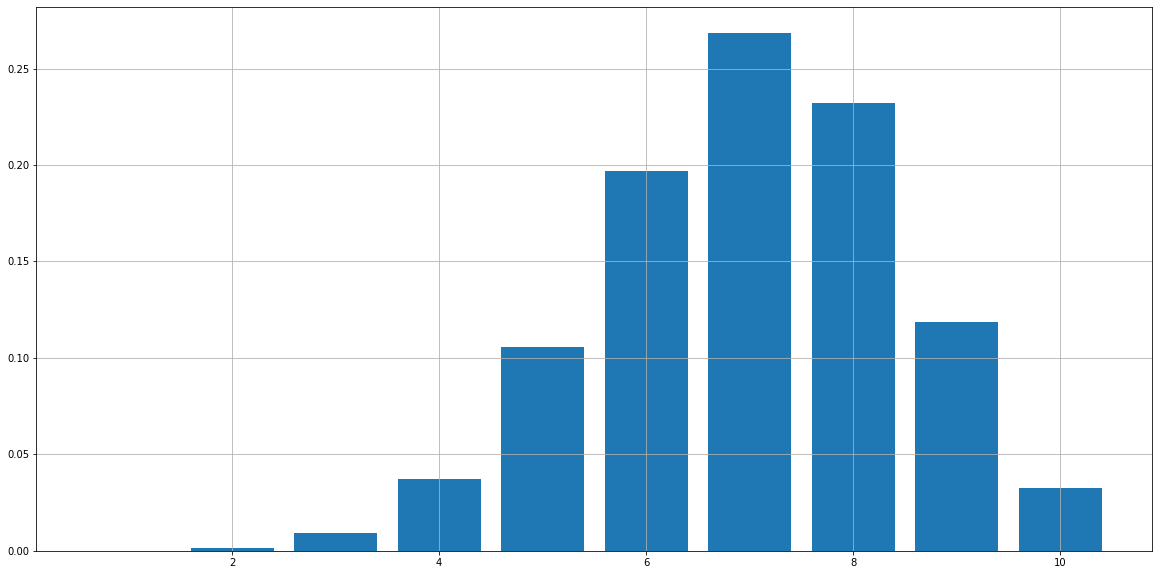

In [36]:
plt.figure(figsize=(20,10))
plt.bar(range(1,11),prob)
plt.grid() #cuadricula
plt.show()

Otra buena propiedad de la distribución binomial es que la media y la varianza son lo suficientemente simples:

$$\bar{u}=np$$
$$\sigma^2=np(1-P)$$

No introduciremos la deducción aquí, pero si estas interesado en ello, te animamos hacerlo por ti mismo, basado en las funciones de probabilidad que hemos dado anteriormente.

## **Distribución Normal**

Antes de ver una distribución normal, primero hablemos de una distribución continua. Como mencionamos anteriormente, usaremos una **función de densidad de probabilidad** (PDF) para modelar la probabilidad que nuestro valor es tomado en nuestro rango especifico. Lo definimos como:

$$P(a<X<b)=\int_a^b f_x(x)dx$$

Ahora podemos hablar de una distribución normal. La **distribución normal** es la más comunmente usada en ciencias naturales, por supuesto también en investigación financiera. La PDF de una distribución normal es dada como:

\\

$$f(x)=\frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

\\

Donde $\mu$ es la media de una distribución normal, y \sigma es la desviación estandar.

Generalmente, si una variable aleatoria X sigue una distribución normal, la representamos por $X \thicksim N(\mu, \sigma^2)$. Especialmente, si una distribución normal tiene una media 0 y una desviación estandar 1, la llamamos **Distribución normal estandar**. Ahora simularemos una distribución normal estandar usando los paquetes de Python para ver como luce: 



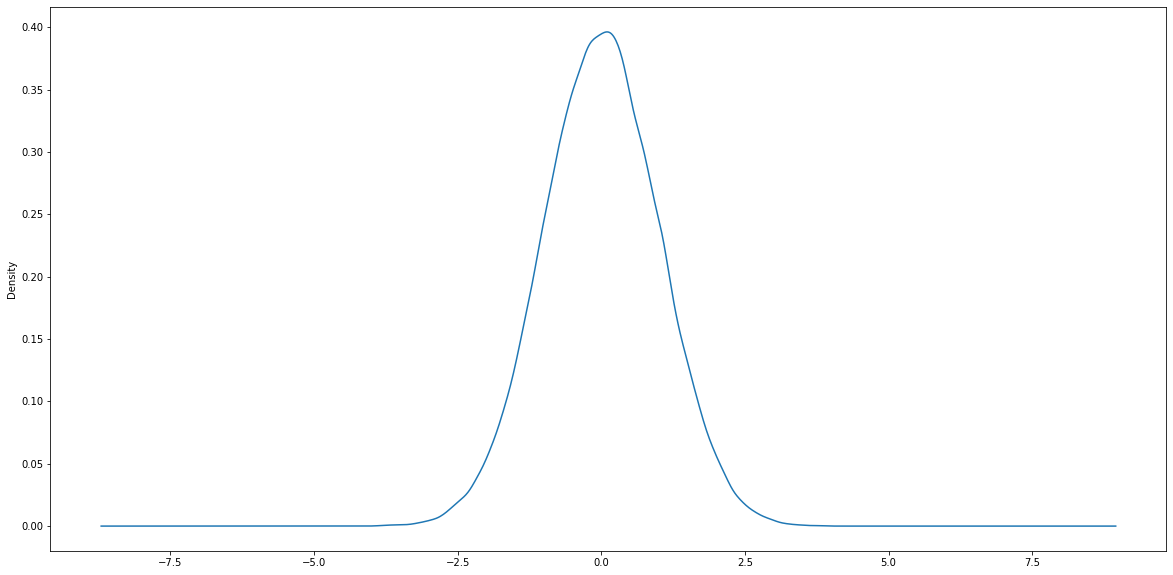

In [50]:

norm = pd.Series(np.random.normal(0,1,100000))
plt.figure(figsize=(20,10))
norm.plot.density()
plt.show()

Los datos financieros están altamente desordenados y son considerados que tienen un montón de ruido. La mayoria del tiempo creemos que ese ruido sigue una distribución normal. también se cree ampliamente que el rendimiento de un activo sobre un corto periodo de tiempo sigue una distribución normal. Revisemolo con la tasa logaritmo diario de rendimiento en SPY.

In [51]:
!pip install --upgrade quandl #Intalación manual de quandl ya que no está implicito en Google Colab

In [54]:
import quandl
quandl.ApiConfig.api_key = '6p5Vs8b-XNnwgNqrcTCs'
spy_table = quandl.get('WIKI/TSLA')
spy = spy_table.loc['2009':'2017',['Open','Close']]
spy['log_return'] = np.log(spy.Close).diff()
spy = spy.dropna()

Calculamos el rendimiento diario logaritmico del indice S&P 500 desde 2009 al presente. Primero echaremos un vistazo a como se ven las series de tiempo.

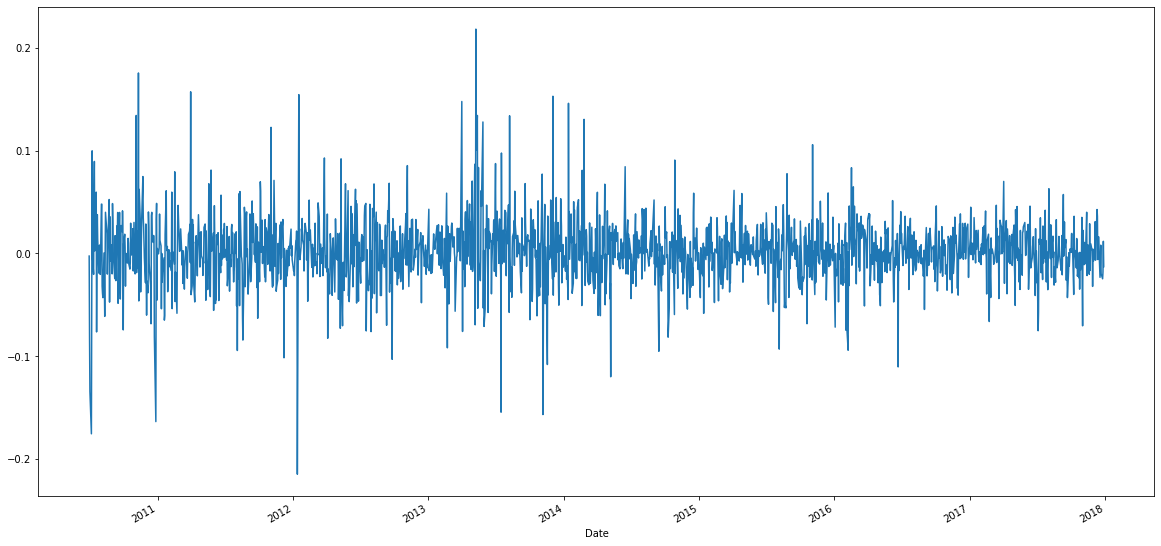

In [58]:
plt.figure(figsize=(20,10))
spy.log_return.plot()
plt.show()

Este es el gráfico de rendimiento clásico diario. Dibujemos ahora el gráfico de la densidad de rendimiento.

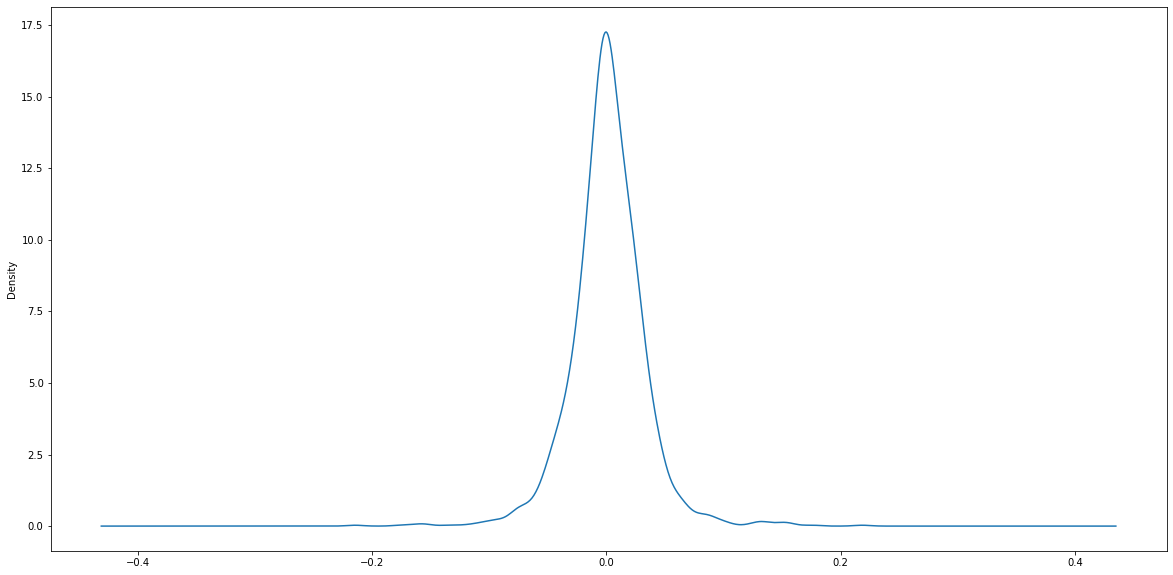

In [59]:
plt.figure(figsize = (20,10))
spy.log_return.plot.density()
plt.show()

Si observamos el eje $x$ y el eje $y$ cuidadosamente, podemos ver que el rendimiento del activo no es una distribución normal estandar. El pico de la gráfica de distribución normal estandar está alrededor de 0.4, mientras esté 0.6 para este gráfico. Esto es porque la desviación estandar $\sigma$ del rendimiento obviamente no es 1. Podemos demostrar la distribución normal con diferente media y varianza por simulación:

<Figure size 1440x720 with 0 Axes>

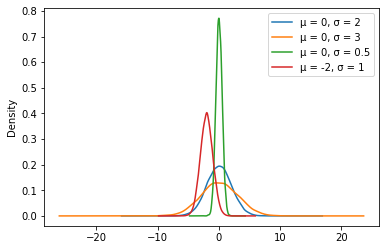

In [60]:
de_2 = pd.Series(np.random.normal(0,2,10000),name = 'μ = 0, σ = 2')
de_3 = pd.Series(np.random.normal(0,3,10000),name = 'μ = 0, σ = 3')
de_0 = pd.Series(np.random.normal(0,0.5,10000), name ='μ = 0, σ = 0.5')
mu_1 = pd.Series(np.random.normal(-2,1,10000),name ='μ = -2, σ = 1')
df = pd.concat([de_2,de_3,de_0,mu_1],axis = 1)
plt.figure(figsize=(20,10))
df.plot.density()
plt.show()

## **Resumen**

En este capitulo presentamos la variable aleatoria, la diferencia entre una distribución discreta aleatoria y una distribución aleatoria continua, y lo más importante, una distribución normal. En el siguiente capitulo presentaremos como usaremos esas distribuciones para probar nuestra idea de generar señales comerciales.